In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


## Import the preprocessed dataset

In [6]:
reviews = pd.read_csv('reviews_clean.csv')
reviews.head()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,clean_content
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo,recur task everi day need todolist remind buzz...
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo,instead shop around download anydo wide use se...
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo,everi blue app ask updat acct email everyth ta...
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo,terribl updat app use perfect plan certain tas...
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo,app deceivingli terribl realli nice design fea...


### Take a look at the dataset

In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16786 entries, 0 to 16785
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16786 non-null  object
 1   userName              16786 non-null  object
 2   userImage             16786 non-null  object
 3   content               16786 non-null  object
 4   thumbsUpCount         16786 non-null  int64 
 5   reviewCreatedVersion  14429 non-null  object
 6   at                    16786 non-null  object
 7   replyContent          9167 non-null   object
 8   repliedAt             9167 non-null   object
 9   appVersion            14429 non-null  object
 10  sortOrder             16786 non-null  object
 11  appId                 16786 non-null  object
 12  clean_content         16695 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.7+ MB


#### Some basic preparations :)

In [8]:
reviews = reviews.dropna(subset=['clean_content'], how='all')

In [10]:
reviews[['at', 'repliedAt']] = reviews[['at', 'repliedAt']].apply(pd.to_datetime)

C:\Users\ARITRA\AppData\Local\Temp\ipykernel_14352\1151776628.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  reviews[['at', 'repliedAt']] = reviews[['at', 'repliedAt']].apply(pd.to_datetime)
C:\Users\ARITRA\AppData\Local\Temp\ipykernel_14352\1151776628.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  reviews[['at', 'repliedAt']] = reviews[['at', 'repliedAt']].apply(pd.to_datetime)


#### Let's make the WordCloud

#### Top 10 Keywords and their occuring frequency in the content

In [ ]:
from collections import Counter

In [ ]:
all_words = all_content.split()
all_words = Counter(all_words)

top_words = all_words.most_common(10)
top_words = pd.DataFrame(top_words, columns=['word', 'freq'])
top_words = top_words.sort_values(by='freq', ascending=True)
top_words

,word,freq
9,day,3067
8,calendar,3184
7,would,3189
6,list,3363
5,work,3696
4,time,4061
3,like,4092
2,task,6220
1,use,6845
0,app,16238


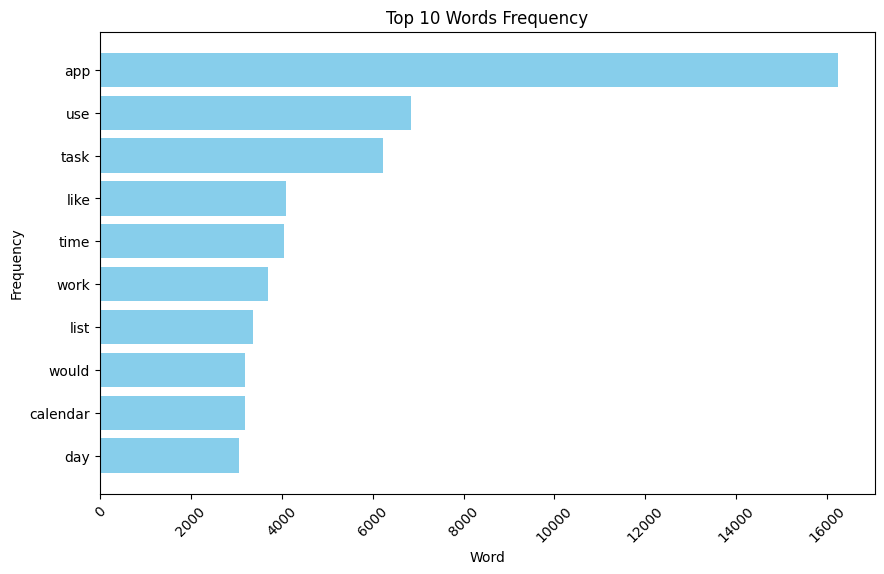

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_words['word'], top_words['freq'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Words Frequency')
plt.xticks(rotation=45)
plt.show()

## Sentiment Analysis

##### We will conduct the sentiment analysis process using two different Python Modules.

1. TextBlob
2. VADER

#### Using TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
def sent_textblob(text):

    p = TextBlob(text).sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    
    return sent



In [ ]:
# Sentiment Analysis with TextBlob
reviews['sentiment_textblob'] = reviews['clean_content'].apply(sent_textblob)
print(reviews['sentiment_textblob'].value_counts())

sentiment_textblob
Positive    10658
Neutral      3909
Negative     2128
Name: count, dtype: int64


#### Using VaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_vader(text):

    p = analyzer.polarity_scores(text)['compound']
    
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    
    return sent

In [ ]:
# Sentiment Analysis with Vader
reviews['sentiment_vader'] = reviews['clean_content'].apply(get_sentiment_vader)
print(reviews['sentiment_vader'].value_counts())

sentiment_vader
Positive    11293
Negative     3076
Neutral      2326
Name: count, dtype: int64


##### Now, Let's take a look at the dataset once

In [ ]:
reviews.head()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,clean_content,sentiment_textblob,sentiment_vader
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo,recur task everi day need todolist remind buzz...,Negative,Negative
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,NaN,most_relevant,com.anydo,instead shop around download anydo wide use se...,Negative,Positive
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo,everi blue app ask updat acct email everyth ta...,Positive,Negative
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,NaN,most_relevant,com.anydo,terribl updat app use perfect plan certain tas...,Positive,Positive
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo,app deceivingli terribl realli nice design fea...,Positive,Positive


##### We can clearly see some sentiment that we got using two different modules are different. This is because of their approach of performing sentiment analysis.

### Plots that show the Sentiments we got:

In [ ]:
import plotly.express as px

#### Monthwise Sentiment Analysis using TextBlob

In [ ]:
dfx = reviews[['at', 'sentiment_textblob']]
dfx['at'] = dfx['at'].dt.month
dfx=dfx.rename(columns={'at':'Months', 'sentiment_textblob': 'Sentiment'})
dfx=dfx.groupby(['Months','Sentiment']).size().reset_index(name='Reviews')
fig4 = px.bar(dfx, x="Months", y="Reviews", color="Sentiment", title="Monthwise Sentiment Analysis using TextBlob")
fig4.show()

C:\Users\ARITRA\AppData\Local\Temp\ipykernel_14352\1873946216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['at'] = dfx['at'].dt.month


Monthwise Sentiment Analysis using VaderSentiment

In [ ]:
dfx = reviews[['at', 'sentiment_vader']]
dfx['at'] = dfx['at'].dt.month
dfx=dfx.rename(columns={'at':'Months', 'sentiment_vader': 'Sentiment'})
dfx=dfx.groupby(['Months','Sentiment']).size().reset_index(name='Reviews')
fig4 = px.bar(dfx, x="Months", y="Reviews", color="Sentiment", title="Monthwise Sentiment Analysis using VaderSentiment")
fig4.show()

C:\Users\ARITRA\AppData\Local\Temp\ipykernel_14352\3173445007.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Finally, Exporting the dataset

In [ ]:
reviews.to_csv('reviews_sentiment_analysis.csv', index=False)